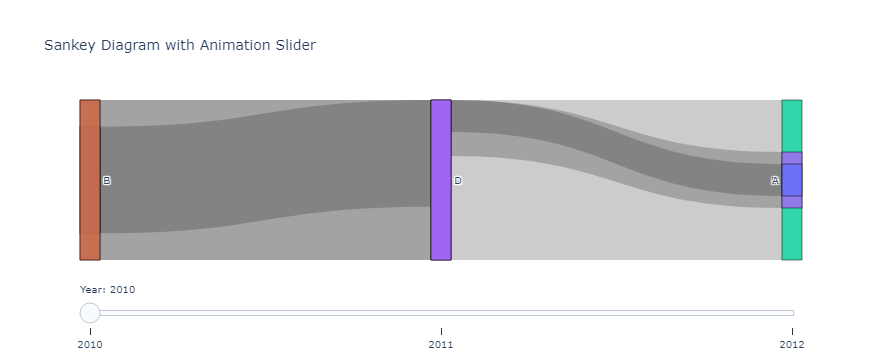

In [28]:
import pandas as pd
import plotly.graph_objects as go

# Sample DataFrame
df = pd.DataFrame({
    'source': ['A', 'B', 'A', 'C', 'B', 'D'],
    'target': ['B', 'C', 'D', 'A', 'D', 'A'],
    'value': [10, 15, 7, 20, 25, 5],
    'year': [2010, 2010, 2011, 2011, 2012, 2012]
})

# Create Sankey Diagram
fig = go.Figure()

unique_nodes = pd.unique(df[['source', 'target']].values.ravel('K'))

for year in df['year'].unique():
    filtered_df = df[df['year'] == year]

    sankey_trace = go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color='black', width=0.5),
            label=unique_nodes
        ),
        link=dict(
            source=filtered_df['source'].map(lambda x: unique_nodes.tolist().index(x)),
            target=filtered_df['target'].map(lambda x: unique_nodes.tolist().index(x)),
            value=filtered_df['value']
        )
    )

    fig.add_trace(sankey_trace)

# Add Animation Slider
steps = []
for i, year in enumerate(df['year'].unique()):
    step = dict(
        args=[
            {'visible': [False] * i + [True] + [False] * (len(df['year'].unique()) - i - 1)}
        ],
        label=str(year),
        method='update'
    )
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps,
    currentvalue={'prefix': 'Year: '},
)]

fig.update_layout(
    sliders=sliders,
    title='Sankey Diagram with Animation Slider',
    font_size=10
)

# Show the figure
fig.show()


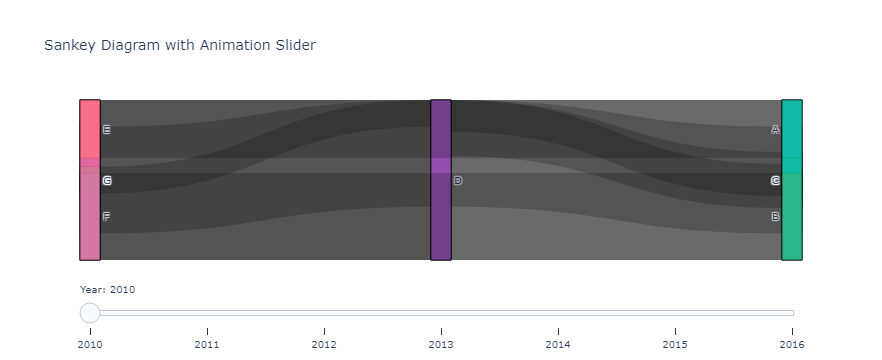

In [31]:
import pandas as pd
import plotly.graph_objects as go

# Sample DataFrame
df = pd.DataFrame({
    'source': ['A', 'B', 'A', 'C', 'B', 'D'],
    'target': ['B', 'C', 'D', 'A', 'D', 'A'],
    'value': [10, 15, 7, 20, 25, 5],
    'year': [2010, 2010, 2011, 2011, 2012, 2012]
})

# Add more data
new_data = {
    'source': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'target': ['B', 'C', 'D', 'A', 'A', 'B', 'C'],
    'value': [15, 10, 5, 30, 8, 12, 18],
    'year': [2013, 2013, 2014, 2014, 2015, 2015, 2016]
}
df = pd.concat([df, pd.DataFrame(new_data)], ignore_index=True)

# Create Sankey Diagram
fig = go.Figure()

unique_nodes = pd.unique(df[['source', 'target']].values.ravel('K'))

for year in df['year'].unique():
    filtered_df = df[df['year'] == year]

    sankey_trace = go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color='black', width=0.5),
            label=unique_nodes
        ),
        link=dict(
            source=filtered_df['source'].map(lambda x: unique_nodes.tolist().index(x)),
            target=filtered_df['target'].map(lambda x: unique_nodes.tolist().index(x)),
            value=filtered_df['value']
        )
    )

    fig.add_trace(sankey_trace)

# Add Animation Slider
steps = []
for i, year in enumerate(df['year'].unique()):
    step = dict(
        args=[
            {'visible': [False] * i + [True] + [False] * (len(df['year'].unique()) - i - 1)}
        ],
        label=str(year),
        method='update'
    )
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps,
    currentvalue={'prefix': 'Year: '},
)]

fig.update_layout(
    sliders=sliders,
    title='Sankey Diagram with Animation Slider',
    font_size=10
)

# Show the figure
fig.show()


In [32]:
import pandas as pd

data = {'Year': [2018, 2018, 2019, 2019, 2020, 2020],
        'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
        'Value': [10, 15, 12, 18, 14, 20]}

df = pd.DataFrame(data)


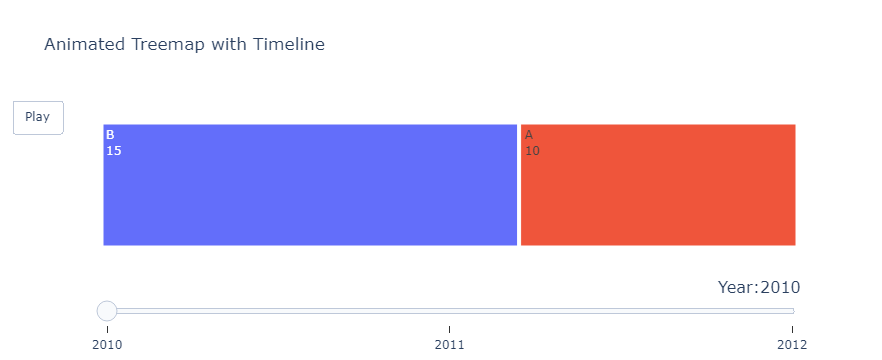

In [42]:
import plotly.graph_objects as go
import pandas as pd

# Sample data (replace this with your own dataset)
data = {
    'Year': [2010, 2010, 2011, 2011, 2012, 2012],
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [10, 15, 12, 18, 14, 20]
}

df = pd.DataFrame(data)

# Create animated treemap
fig = go.Figure()

frames = []

for year in df['Year'].unique():
    subset_df = df[df['Year'] == year]
    frame = go.Frame(
        data=[go.Treemap(
            labels=subset_df['Category'],
            parents=['']*len(subset_df),
            values=subset_df['Value'],
            text=subset_df['Value'],
            customdata=subset_df['Category'],
            hovertemplate='Category: %{customdata}<br>Value: %{text}',
            name=str(year)
        )],
        name=str(year)
    )
    frames.append(frame)

fig.add_trace(go.Treemap(
    labels=df[df['Year'] == df['Year'].min()]['Category'],
    parents=['']*len(df[df['Year'] == df['Year'].min()]),
    values=df[df['Year'] == df['Year'].min()]['Value'],
    text=df[df['Year'] == df['Year'].min()]['Value'],
    customdata=df[df['Year'] == df['Year'].min()]['Category'],
    hovertemplate='Category: %{customdata}<br>Value: %{text}',
    name=str(df['Year'].min())
))

fig.update_layout(
    title='Animated Treemap with Timeline',
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]
        }]
    }],
    sliders=[{
        'yanchor': 'top',
        'xanchor': 'left',
        'currentvalue': {
            'font': {'size': 16},
            'prefix': 'Year:',
            'visible': True,
            'xanchor': 'right'
        },
        'transition': {'duration': 300, 'easing': 'cubic-in-out'},
        'steps': [{
            'label': str(year),
            'method': 'animate',
            'args': [[str(year)], {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate'}]
        } for year in df['Year'].unique()]
    }]
)

fig.frames = frames
fig.show()
